# **Task 2** - **To Explore Supervised Machine Learning**

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.


**Problem Statement** - What will be predicted score if a student study for 9.25 hrs in a
day?

**A little introduction on Simple Linear Regression:**

Why Regression? -> *to solve problems related to the prediction of a numerical value.*

Now in context of Regression, note that,  
*   dependent / target variable(Y) -> value that is to be predicted *(score)*
*   predictors / indpendent variable(X) -> rest of the features that will help us predict the target value *(hours)*






Our target 

In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

I'll give you a quick intro on these libraries:


1.   Numpy - It is majorly used for solving mathematical equations and we will be needing this library for evaluating our model
2.   Pandas - It provides best tools for quick analysis in preparing and loading the data 
3.   Matplotlib - It will help us plot visualisations



# Simple Linear Regression
It consists of only one predictor/independent variable i.e. X and ofcourse one target/dependent variable i.e. Y. The model will try to assume a linear relationship between the dependent variable and the predictor variabl


In [2]:
#load and view dataset
df = pd.read_csv('http://bit.ly/w-data"')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Great, no null values!

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




Let's break this down now,

count -> number of rows(data points)

mean -> mean of the entire dataset

std -> standard deviation of the entire dataset

min -> minimum value in the dataset

25% (quantile value) -> 25% of the students have marks lower than or equal to 30

50%(median value) -> 50% of the students have marks lower than or equal to 47

75% -> 75% of the students have marks lower than or equal to 75

max -> maximum value in the dataset 


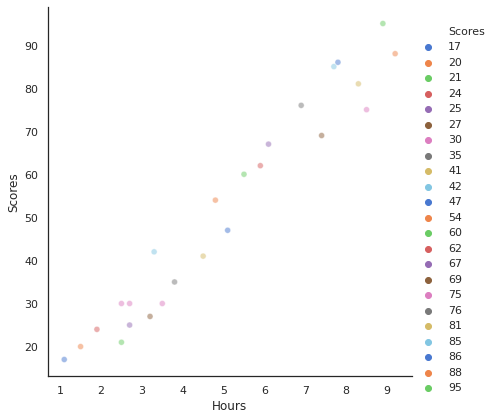

In [14]:
import seaborn as sns
sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Hours", y="Scores", data=df, hue="Scores", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6)

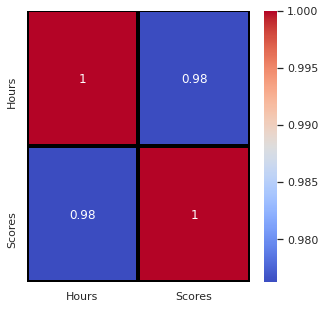

In [16]:
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm',  linewidths=3, linecolor='black')
plt.show()

See, Both the graphs above shows Positive correlation ! 

P.S. Positive correlation signifies that with the increase in value of x, value of y increases as well


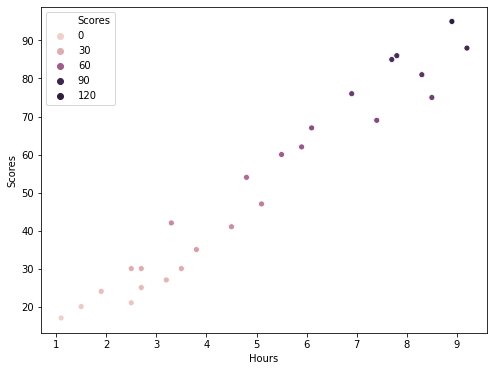

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Hours' ,y='Scores', hue='Scores', data=df)

This clearly depicts that those who studied for lesser hours, got lesser marks as compared to those who studied for more hours who scored comparatively higher marks

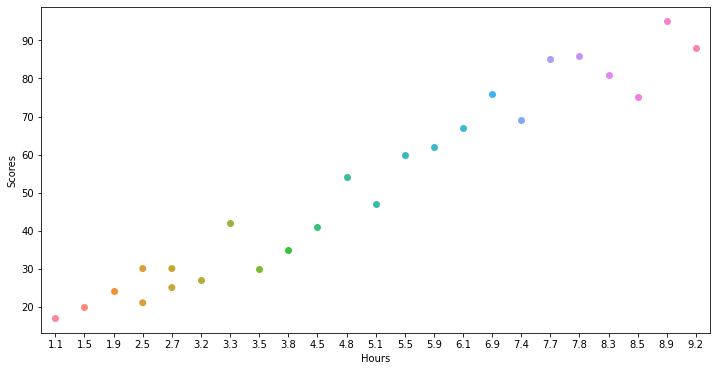

In [ ]:
#line graph
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Hours", y="Scores", data=df, size = 7)

This graph shows more accurate values as all data points are visible. Now let's move to model ensembling

In [ ]:
#splitting data into features(X) and target variable(y)
X = df[['Hours']]
y = df['Scores']

In [ ]:
#splitting data into 80% train and 20% test 
# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Let's understand what we are supposed to do,

If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that "best fits" the data points.It’s impossible to connect all the marks with a straight line, so you use a best fitting line.

Now, how do you find the best fitting line? Since our data points(values of x and y) will remain constant for a particular dataset, we can only alter b0 and b1(also called hyperparameters)(y= b0 + b1*x -> equation for simple linear regression).

Hence, Our objective is to find the values of b0 and b1 that will best fit this data.

The line you find IS your regression model!


In [ ]:
#model training
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#finding intercept and coefficients(bo and b1)
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

2.018160041434662
[9.91065648]


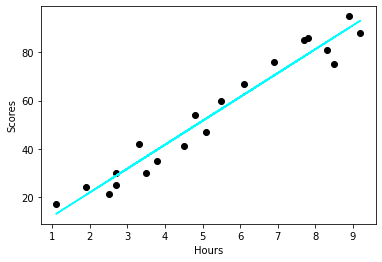

In [ ]:
#training set
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_train, linear_regressor.predict(X_train), color = 'cyan')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#lets make predictions
y_pred = linear_regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


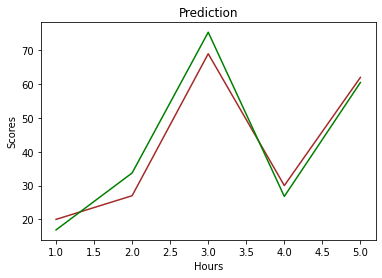

In [ ]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='brown',linestyle='-')
plt.plot(c,y_pred,color='green',linestyle='-')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction')
plt.show()

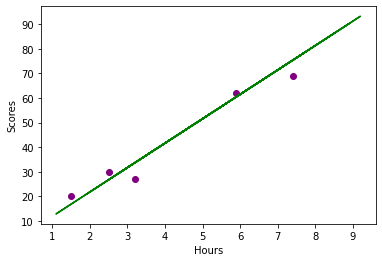

In [ ]:
#test set
plt.scatter(X_test, y_test, color = 'purple')
plt.plot(X_train, linear_regressor.predict(X_train), color = 'green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
no_of_hours = 9.25
predictor = linear_regressor.predict(np.array([9.25]).reshape(1, 1))
print("No. of Hours = {}".format(no_of_hours))
print("Predicted Score = {}".format(predictor[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


Model Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
r2 = r2_score(y_test,y_pred)
rsmq=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Squared Error: ",rsmq)
print('r square :',r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Root Squared Error:  4.647447612100373
r square : 0.9454906892105354
Mean Absolute Error: 4.183859899002982
